In [1]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import pickle

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import matplotlib.colors as mcolors
import matplotlib.patheffects as fx

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import os
import sys
# if my user name is gafarge then use the following path
if os.getlogin() == 'gafarge':
    workdir = '/home/gafarge/'
elif os.getlogin() == 'root':
    workdir = '/Users/gaspard/Documents/work/'

# Load data

In [2]:
# Nankai (main) results
nankai2 = pickle.load(open('../results/nankai/nank2_synch.pkl', 'rb'))

nank2_corr_lengths = nankai2['corr_lengths']
nank2_n_eqs = nankai2['n_felt_eqs']
nank2_n_trms = nankai2['n_tremors']
nank2_n_trm_min = nankai2['parameters']['min_n_tremor_dx10km']

In [3]:
# Nankai (secondary) results
nankai = pickle.load(open('../results/nankai/nank_synch.pkl', 'rb'))

nank_corr_lengths = nankai['corr_lengths']
nank_n_eqs = nankai['n_felt_eqs']
nank_n_trms = nankai['n_tremors']
nank_n_trm_min = nankai['parameters']['min_n_tremor_dx10km']

In [4]:
# Japan trench results
jptrench = pickle.load(open('../results/jptrench/jpt_synch.pkl', 'rb'))

jpt_corr_lengths = jptrench['corr_lengths']
jpt_n_eqs = jptrench['n_felt_eqs']
jpt_n_trms = jptrench['n_tremors']

jpt_n_trm_min = jptrench['parameters']['min_n_tremor_dx10km']

In [5]:
# Cascadia results
cascadia = pickle.load(open('../results/cascadia/casc_synch.pkl', 'rb'))

casc_corr_lengths = cascadia['corr_lengths']
casc_n_eqs = cascadia['n_felt_eqs']
casc_n_trms = cascadia['n_tremors']

casc_n_trm_min = cascadia['parameters']['min_n_tremor_dx10km']

# Make figure

In [6]:
# Select parameters of results
min_mag = 2.2  # min magnitude of eqs
max_dist = 50  # max distance for "felt" eq (km)
v_min = 3.5  # min migration velocity (km/d)
cc_thr = 0.07  # correlation threshold to define correlation distance
dx_bin = 10  # bin size (km)

casc_cl = casc_corr_lengths[f'dx{dx_bin:d}km'][f'v{v_min:.1f}kmd'][f'cc{cc_thr:.2f}']
casc_neq = casc_n_eqs[f'dx{dx_bin:d}km'][f'm{min_mag:.1f}'][f'{max_dist:d}km']
casc_x = np.arange(cascadia['parameters']['xmin_bin'], cascadia['parameters']['xmax_bin'] + dx_bin, dx_bin)
casc_x = casc_x[:-1] + dx_bin / 2

nank_cl = nank_corr_lengths[f'dx{dx_bin:d}km'][f'v{v_min:.1f}kmd'][f'cc{cc_thr:.2f}']
nank_neq = nank_n_eqs[f'dx{dx_bin:d}km'][f'm{min_mag:.1f}'][f'{max_dist:d}km']
nank_x = np.arange(nankai['parameters']['xmin_bin'], nankai['parameters']['xmax_bin'] + dx_bin, dx_bin)
nank_x = nank_x[:-1] + dx_bin / 2

nank2_cl = nank2_corr_lengths[f'dx{dx_bin:d}km'][f'v{v_min:.1f}kmd'][f'cc{cc_thr:.2f}']
nank2_neq = nank2_n_eqs[f'dx{dx_bin:d}km'][f'm{min_mag:.1f}'][f'{max_dist:d}km']
nank2_x = np.arange(nankai2['parameters']['xmin_bin'], nankai2['parameters']['xmax_bin'] + dx_bin, dx_bin)
nank2_x = nank2_x[:-1] + dx_bin / 2

jpt_cl = jpt_corr_lengths[f'dx{dx_bin:d}km'][f'v{v_min:.1f}kmd'][f'cc{cc_thr:.2f}']
jpt_neq = jpt_n_eqs[f'dx{dx_bin:d}km'][f'm{min_mag:.1f}'][f'{max_dist:d}km']
jpt_x = np.arange(jptrench['parameters']['xmin_bin'], jptrench['parameters']['xmax_bin'] + dx_bin, dx_bin)
jpt_x = jpt_x[:-1] + dx_bin / 2

# Filter the bins where no tremor
nank_no_trm = nank_n_trms['dx10km'] < nank_n_trm_min
nank_cl[nank_no_trm] = np.nan
nank_neq[nank_no_trm] = np.nan

nank2_no_trm = nank2_n_trms['dx10km'] < nank2_n_trm_min
nank2_cl[nank2_no_trm] = np.nan
nank2_neq[nank2_no_trm] = np.nan

jpt_no_trm = jpt_n_trms['dx10km'] < jpt_n_trm_min
jpt_cl[jpt_no_trm] = np.nan
jpt_neq[jpt_no_trm] = np.nan

casc_no_trm = casc_n_trms['dx10km'] < casc_n_trm_min
casc_cl[casc_no_trm] = np.nan
casc_neq[casc_no_trm] = np.nan

## Only Japan

In [7]:
# Parameters
figsize = (7.24, 4)

sci_adv_red = [183/255, 53/255, 47/255]

widths = (660, 840)
heights = (1, .1, 1)

adj_dict = {'left': 0.05, 'right': 0.95, 'bottom': 0.15, 'top': 0.95, 'wspace': 0.2, 'hspace': 0.5}

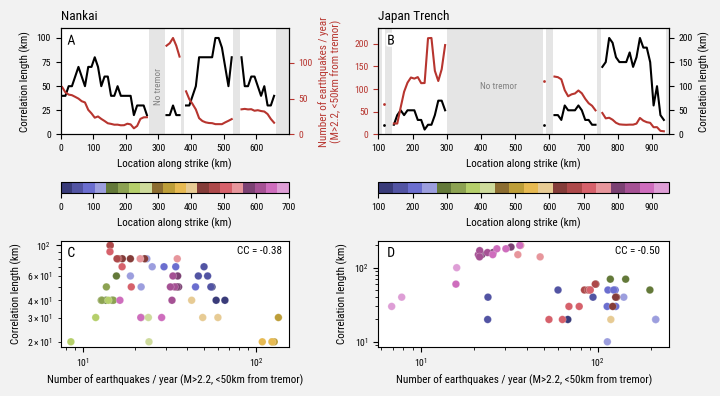

In [8]:
# Figure
with plt.style.context('grl'):
    fig = plt.figure(figsize=figsize, facecolor='.95')
    gs = fig.add_gridspec(3, 2, width_ratios=widths, height_ratios=heights)

    for ii, (cl, neq, x, no_trm) in enumerate(zip([nank2_cl, jpt_cl], [nank2_neq, jpt_neq], [nank2_x, jpt_x], [nank2_no_trm, jpt_no_trm])):
        # Along-strike
        ax = fig.add_subplot(gs[0, ii])
        ax.set_xlabel('Location along strike (km)')
        ylabel = ax.set_ylabel('Correlation length (km)')
        ax.set_xticks(np.arange(0, x.max(), 100))
        if ii == 0:
            ax.set_title('Nankai', loc='left')
        elif ii == 1:
            ax.set_title('Japan Trench', loc='left')

        ax.set_xlim(x.min()-dx_bin/2, x.max()+dx_bin/2)
        ax.set_ylim(0, 1.1 * np.max(cl[~np.isnan(cl)]))

        ax_eq = ax.twinx()
        ax_eq.set_ylim(0, 1.1 * np.max(neq[~np.isnan(neq)]))
        ax_eq.set_ylabel('Number of earthquakes / year\n(M>2.2, <50km from tremor)', c=sci_adv_red)
        ax_eq.tick_params(axis='y', colors=sci_adv_red)


        if ii == 1:
            # Move correlation length axis to the right
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
            
            # Move number of earthquakes axis to the left
            ax_eq.yaxis.tick_left()
            ax_eq.yaxis.set_label_position('left')
            ax_eq.set_ylabel('')

        ax.plot(x, cl, color='k')
        ax_eq.plot(x, neq, color=sci_adv_red)
        
        # Plot other Nankai
        # if ii == 0:
        #     ax.plot(nank_x, nank_cl, color='k', alpha=0.5, zorder=-1)

        # Where no tremor
        for jj in np.where(no_trm)[0]:
            ax.axvspan(x[jj]-dx_bin/2, x[jj]+dx_bin/2, facecolor=to_rgba('k', .1), zorder=-1, edgecolor='none')

        if ii == 0:
            ax.text(300, 50, 'No tremor', rotation=90, ha='center', va='center', fontsize='small', c='.5')
        elif ii == 1:
            ax.text(450, 100, 'No tremor', ha='center', va='center', fontsize='small', c='.5')

        # Isolated segments
        isolated_point = np.isnan(neq)[:-2] & np.isnan(neq)[2:] & ~np.isnan(neq)[1:-1]
        ax.plot(x[1:-1][isolated_point], cl[1:-1][isolated_point], 'o', color='k', zorder=10, mec='w', mew=0, ms=2)
        ax_eq.plot(x[1:-1][isolated_point], neq[1:-1][isolated_point], 'o', color=sci_adv_red, zorder=10, mec='w', mew=0, ms=2)

        ax.text(.03, .95, '{:}'.format('AB'[ii]), transform=ax.transAxes, ha='left', va='top', fontsize=10, path_effects=[fx.Stroke(linewidth=3, foreground='1.0'), fx.Normal()])

        # Relationship
        ax = fig.add_subplot(gs[2, ii])
        ax.set_xlabel('Number of earthquakes / year (M>2.2, <50km from tremor)')
        ax.set_ylabel('Correlation length (km)')
        sc = ax.scatter(neq, cl, c=x, edgecolor=to_rgba('w', .3), linewidths=.5, cmap='tab20b', s=30, vmin=x.min()-dx_bin/2, vmax=x.max()+dx_bin/2)
        
        ax.set_xscale('log')
        ax.set_yscale('log')

        log10_neq = np.log10(neq[np.isfinite(neq) & np.isfinite(cl)])
        log10_cl = np.log10(cl[np.isfinite(neq) & np.isfinite(cl)])
        cc = np.corrcoef(log10_neq, log10_cl)[0, 1]
        ax.text(.97, .95, f'CC = {cc:.2f}', transform=ax.transAxes, ha='right', va='top')

        ax.text(.03, .95, '{:}'.format('CD'[ii]), transform=ax.transAxes, ha='left', va='top', fontsize=10, path_effects=[fx.Stroke(linewidth=3, foreground='1.0'), fx.Normal()])

        # Colorbar
        ax = fig.add_subplot(gs[1, ii])
        plt.colorbar(sc, cax=ax, label='Location along strike (km)', orientation='horizontal')

    plt.tight_layout()
    plt.savefig('../figures/japan_results_figure.png', dpi=300)
    plt.savefig('../figures/japan_results_figure.pdf', dpi=300)
    plt.show()

## Japan and Cascadia

In [9]:
# Parameters
figsize = (7.24, 3.5)

sci_adv_red = [183/255, 53/255, 47/255]

widths = (660, 840, 1200)
heights = (1, .07, 1)

adj_dict = {'left': 0.05, 'right': 0.95, 'bottom': 0.15, 'top': 0.95, 'wspace': 0.1, 'hspace': 0.5}

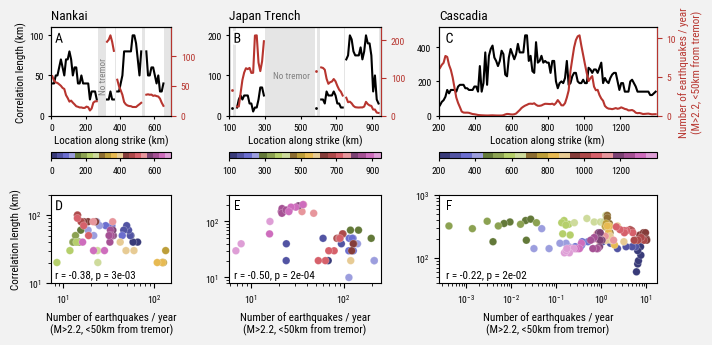

In [10]:
# Figure
with plt.style.context('grl'):
    fig = plt.figure(figsize=figsize, facecolor='.95')
    gs = fig.add_gridspec(3, 3, width_ratios=widths, height_ratios=heights)

    corr_lengths = [nank2_cl, jpt_cl, casc_cl]
    n_eqs = [nank2_neq, jpt_neq, casc_neq]
    xs = [nank2_x, jpt_x, casc_x]
    no_trms = [nank2_no_trm, jpt_no_trm, casc_no_trm]
    titles = ['Nankai', 'Japan Trench', 'Cascadia']

    for ii, (cl, neq, x, no_trm, title) in enumerate(zip(corr_lengths, n_eqs, xs, no_trms, titles)):
        # Along-strike
        ax = fig.add_subplot(gs[0, ii])
        ax.text(.03, .95, '{:}'.format('ABC'[ii]), transform=ax.transAxes, ha='left', va='top', fontsize=10, path_effects=[fx.Stroke(linewidth=3, foreground='1.0'), fx.Normal()])
        ax.set_title(title, loc='left')
        
        # xaxis
        ax.set_xlabel('Location along strike (km)', labelpad=2)
        ax.set_xlim(x.min()-dx_bin/2, x.max()+dx_bin/2)

        # correlation length
        ax.set_ylim(0, 1.1 * np.max(cl[~np.isnan(cl)]))

        ax.plot(x, cl, color='k')

        # number of earthquakes
        ax_eq = ax.twinx()
        ax_eq.set_ylim(0, 1.1 * np.max(neq[~np.isnan(neq)]))
        ax_eq.tick_params(axis='y', colors=sci_adv_red)
        ax_eq.spines['right'].set_color(sci_adv_red)

        ax_eq.plot(x, neq, color=sci_adv_red)
        
        # shrink all ticks
        ax.tick_params(axis='both', which='both', length=2)

        # where no tremor
        for jj in np.where(no_trm)[0]:
            ax.axvspan(x[jj]-dx_bin/2, x[jj]+dx_bin/2, facecolor=to_rgba('k', .1), zorder=-1, edgecolor='none')
        if ii == 0:
            ax.text(305, 50, 'No tremor', rotation=90, ha='center', va='center', fontsize='small', c='.5')
        elif ii == 1:
            ax.text(450, 100, 'No tremor', ha='center', va='center', fontsize='small', c='.5')

        # isolated segments
        isolated_point = np.isnan(neq)[:-2] & np.isnan(neq)[2:] & ~np.isnan(neq)[1:-1]
        ax.plot(x[1:-1][isolated_point], cl[1:-1][isolated_point], 'o', color='k', zorder=10, mec='w', mew=0, ms=2)
        ax_eq.plot(x[1:-1][isolated_point], neq[1:-1][isolated_point], 'o', color=sci_adv_red, zorder=10, mec='w', mew=0, ms=2)

        # on the sides
        if ii == 0:
            ax.set_ylabel('Correlation length (km)', labelpad=2)
        if ii == 2:
            ax_eq.set_ylabel('Number of earthquakes / year\n(M>2.2, <50km from tremor)', c=sci_adv_red, labelpad=2)

        # better ticks
        if ii == 0:
            ax.set_xticks(np.arange(0, x.max(), 200))
        elif ii == 1:
            ax.set_xticks(np.arange(100, x.max(), 200))
        elif ii == 2:
            ax.set_xticks(np.arange(200, x.max(), 200))

        # Relationship
        ax = fig.add_subplot(gs[2, ii])
        ax.text(.03, .95, '{:}'.format('DEF'[ii]), transform=ax.transAxes, ha='left', va='top', fontsize=10, path_effects=[fx.Stroke(linewidth=3, foreground='1.0'), fx.Normal()])

        sc = ax.scatter(neq, cl, c=x, edgecolor=to_rgba('w', .3), linewidths=.5, cmap='tab20b', s=30, vmin=x.min()-dx_bin/2, vmax=x.max()+dx_bin/2)
        
        ax.set_xscale('log')
        ax.set_yscale('log')

        ax.set_xlabel('Number of earthquakes / year\n(M>2.2, <50km from tremor)')

        if ii == 0:
            ax.set_ylim(10, 200)
            ax.set_ylabel('Correlation length (km)')
        elif ii == 1:
            ax.set_ylim(8, 300)
        elif ii == 2:
            ax.set_ylim(40, 1000)

        log10_neq = np.log10(neq[np.isfinite(neq) & np.isfinite(cl)])
        log10_cl = np.log10(cl[np.isfinite(neq) & np.isfinite(cl)])
        cc, pvalue = pearsonr(log10_neq, log10_cl)

        ax.text(.03, .03, f'r = {cc:.2f}, p = {pvalue:.0e}', transform=ax.transAxes, ha='left', va='bottom')

        # Colorbar
        ax = fig.add_subplot(gs[1, ii])
        plt.colorbar(sc, cax=ax, orientation='horizontal')
        
        # shrink ticks
        ax.tick_params(axis='both', which='both', length=2)
        # better ticks
        if ii == 0:
            ax.set_xticks(np.arange(0, x.max(), 200))
        elif ii == 1:
            ax.set_xticks(np.arange(100, x.max(), 200))
        elif ii == 2:
            ax.set_xticks(np.arange(200, x.max(), 200))

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.6)
    plt.savefig('../figures/individual_results_figure.png', dpi=600)
    plt.savefig('../figures/individual_results_figure.pdf', dpi=600)
    plt.show()